In [1]:
#importar las bibliotecas necesarias
import numpy as np
import imutils
import cv2
from imutils.object_detection import non_max_suppression
import matplotlib.pyplot as plt

In [2]:
# se inicializa descriptor HOG y SVM
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [3]:
#indicamos la direccion de la imagen
ruta_img = '/home/miguel/Documents/sr/basic1/fotos/pedestrian3.jpeg'
imagen = cv2.imread(ruta_img)
imagen = imutils.resize(imagen, width = min(400, imagen.shape[1]))

In [4]:
#detectar peatones en la imagen
(rectas, weights) = hog.detectMultiScale(imagen, winStride= (4,4), padding =(8,8), scale = 1.05)
#winStride = (2,2) , (6,6), (8,8) ...
#padding = (2,2), (4,4), (8,8)...

In [5]:
#enmarcar peatones detectados
rectas = np.array([[x,y,x+w,y+h] for (x,y,w,h) in rectas])
#suprimir multiples selecciones para un peaton
eleccion = non_max_suppression(rectas, probs = None, overlapThresh = 0.65)

In [6]:
#dibujar cuadros finales en imagen
for (xA, yA, xB, yB) in eleccion:
    cv2.rectangle(imagen, (xA, yA), (xB, yB), (0,255,0), 2)

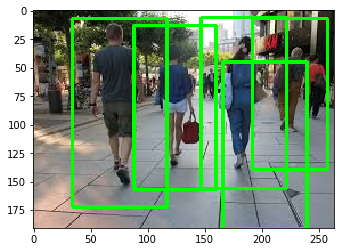

In [7]:
#mostrar la imagen
imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR)
plt.imshow(imagen)